In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,PowerTransformer
import math  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# change the path accoeding to the environment

dataset1_path = r"/kaggle/input/obesity/ObesityDataSet_raw_and_data_sinthetic.csv"
dataset2_path = r'/kaggle/input/dataworld-obesity-levels/obesity_data.csv'

In [2]:
df=pd.read_csv(dataset1_path)
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



## Exploratory data analysis       

In [3]:

print(df.info())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

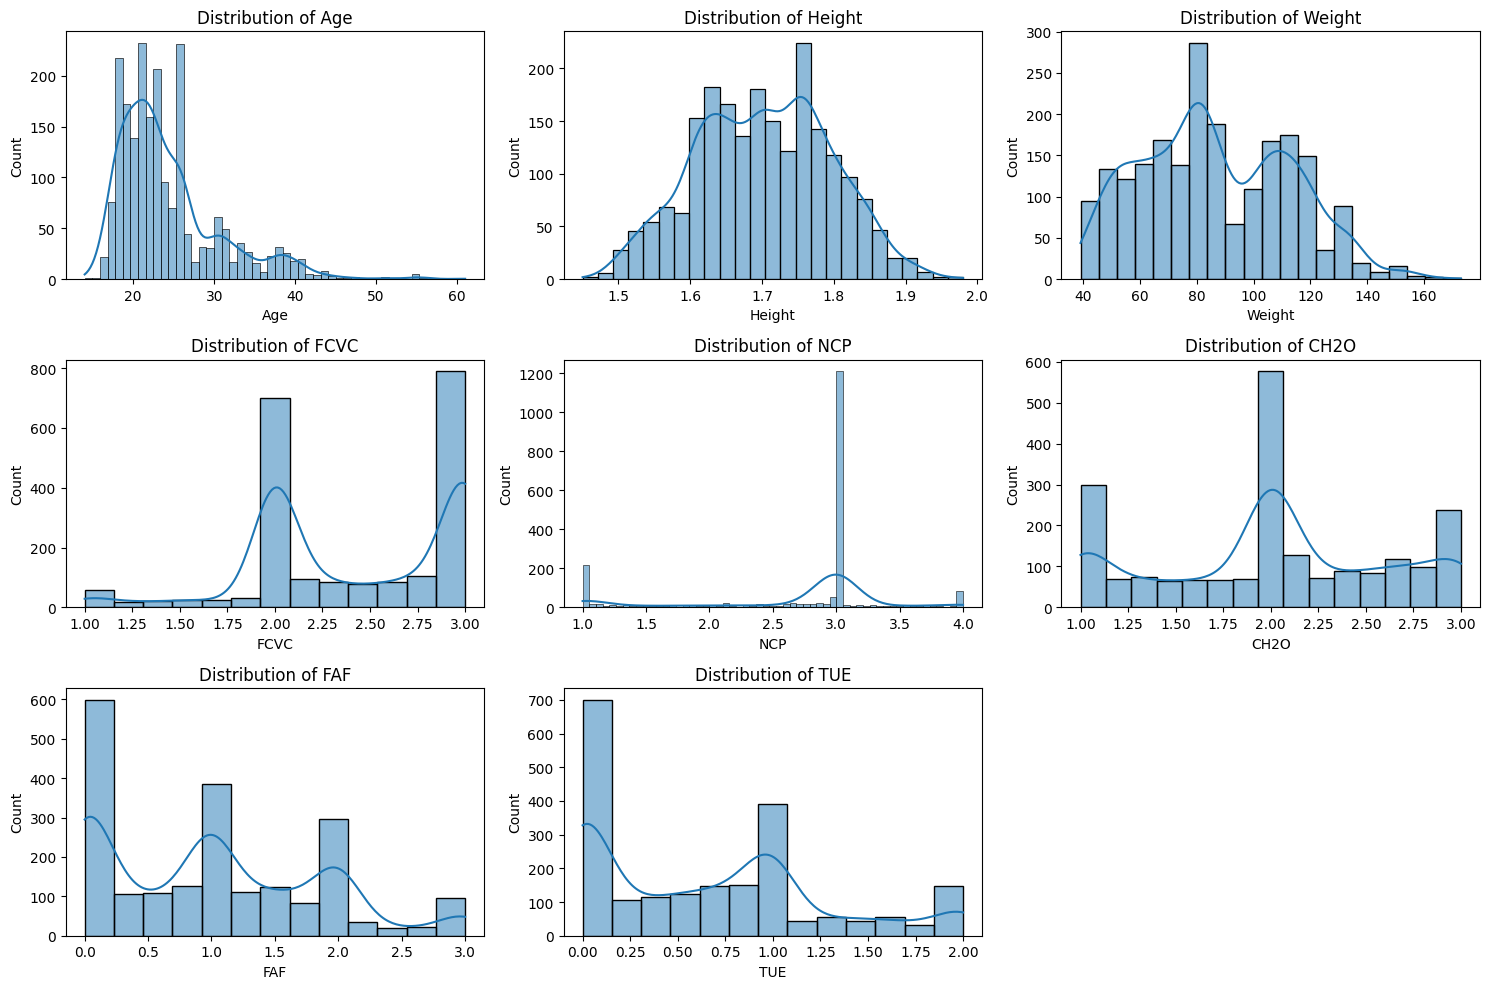

In [4]:
# Plot distribution of numerical features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


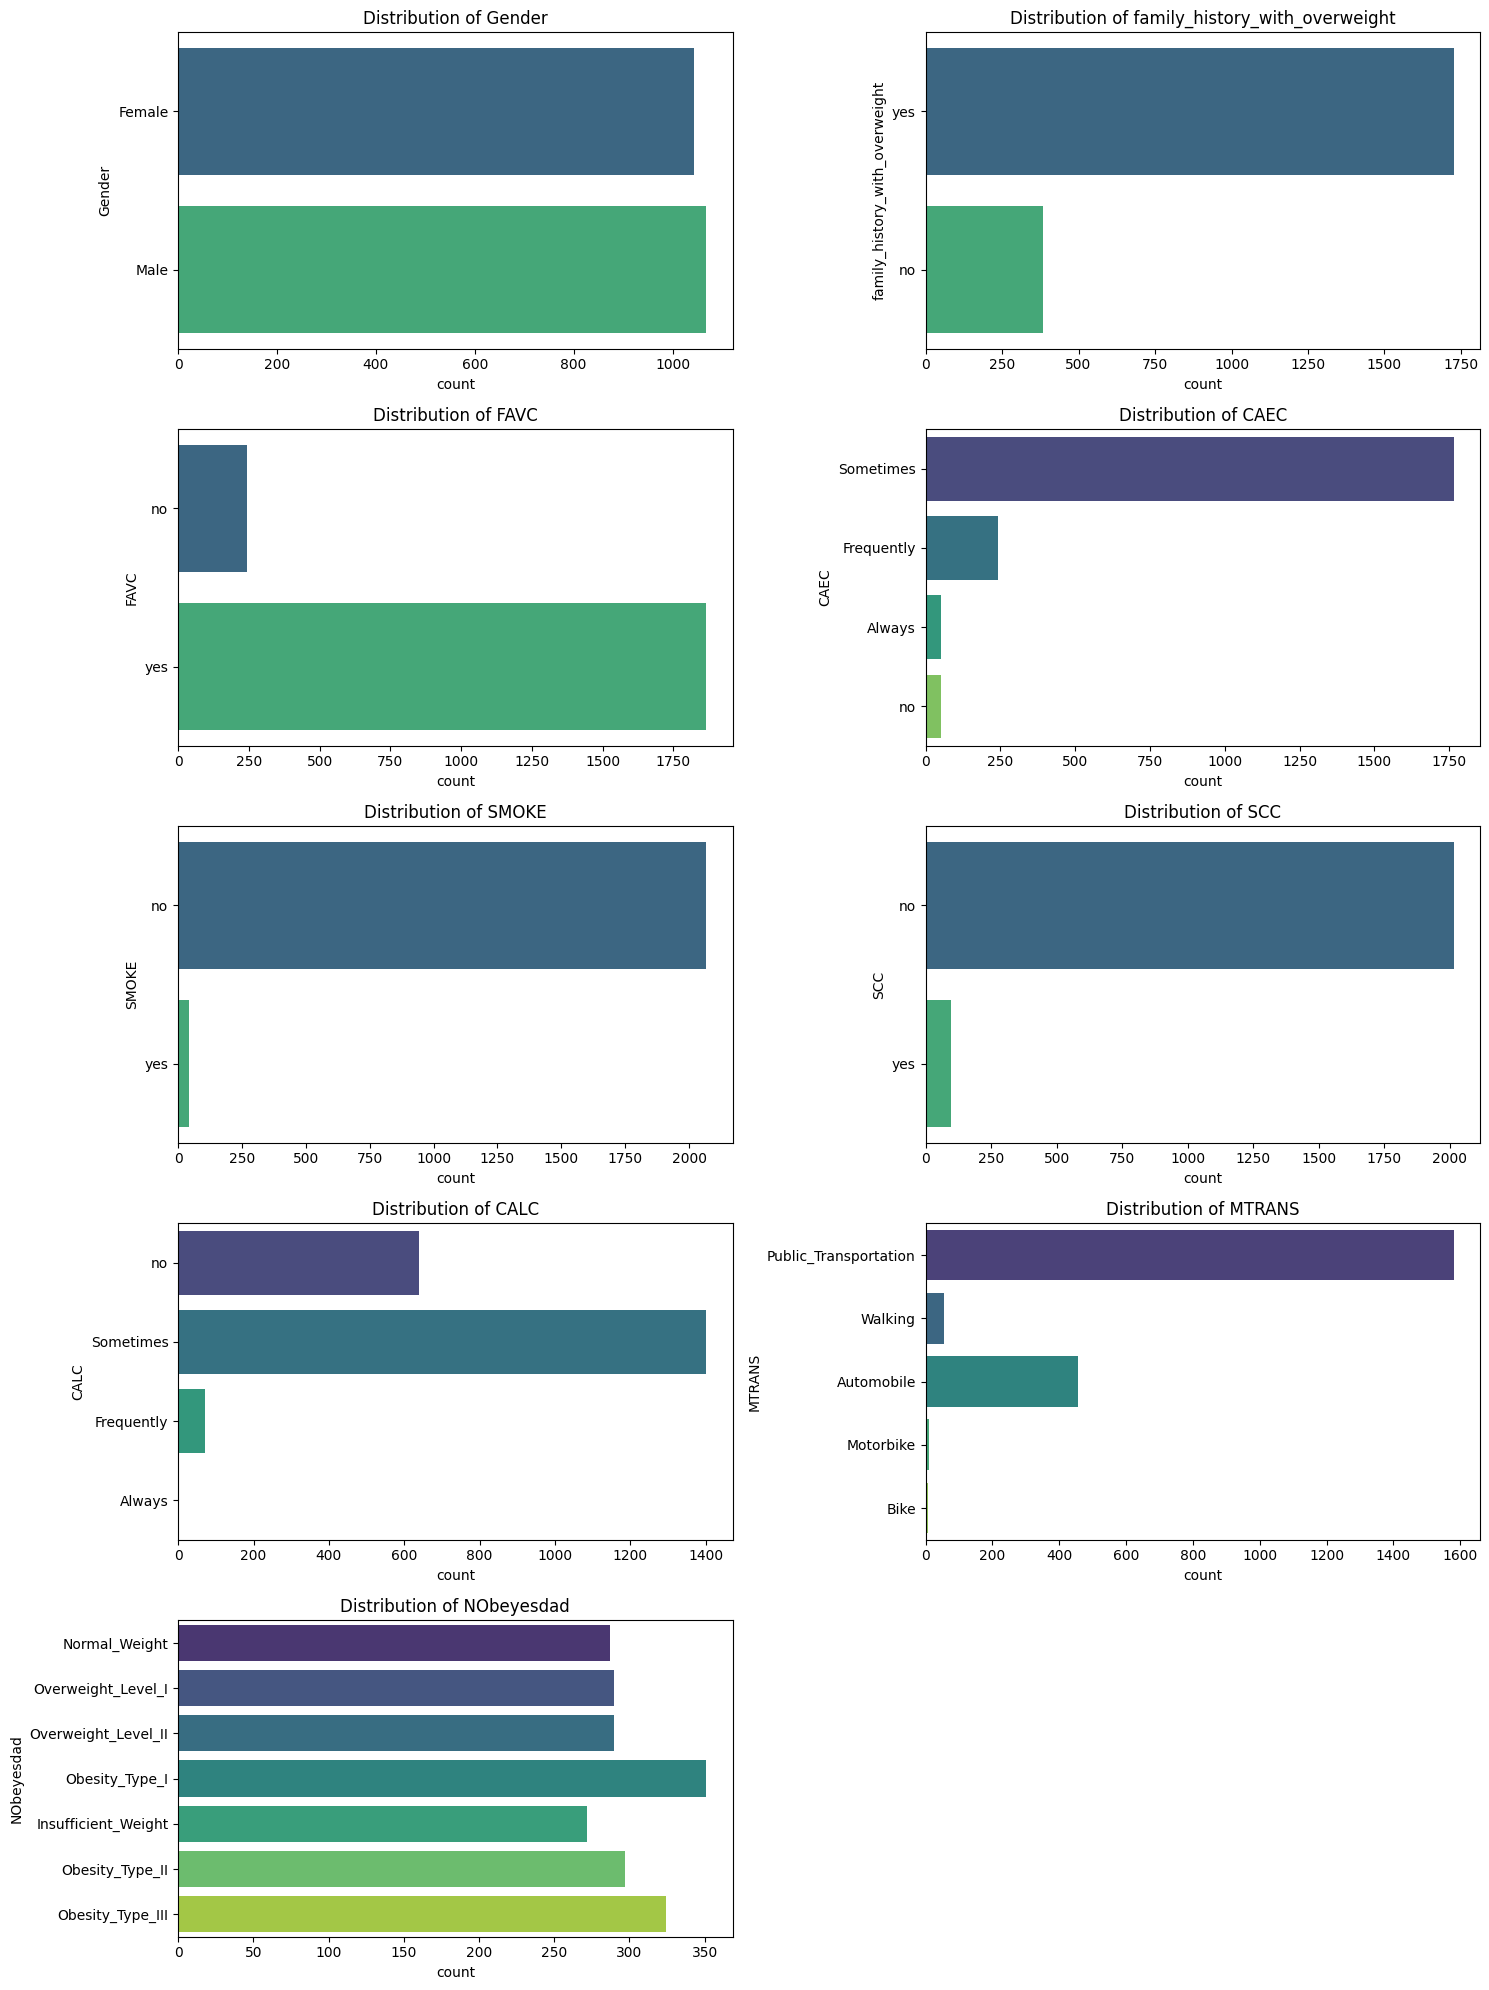

In [5]:
# Plot distribution of categorical features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(y=df[feature], palette='viridis')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


In [ ]:
#  Correlation matrix
corr_matrix = df[numerical_features].corr()

#  Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=df['NObeyesdad'], palette='coolwarm')
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
palette = sns.color_palette('husl', n_colors=len(numerical_features))
   
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='NObeyesdad', y=feature, data=df, palette=palette)
    plt.title(f'{feature} vs Obesity Level')
    plt.xticks(rotation=45)

plt.tight_layout()

# Save the figure
plt.savefig('boxplots_obesity_vs_features.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()



In [ ]:
# Count plots to analyze relationships between categorical features and target variable
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features[:-1], 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=feature, hue='NObeyesdad', data=df, palette='viridis')
    plt.title(f'{feature} vs Obesity Level')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## The second dataset (Exploratory data analysis)

In [ ]:
import pandas as pd

data_obesity = pd.read_csv(dataset2_path)

data_obesity.head()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue='ObesityCategory', data=data_obesity, palette='Set2')
plt.title('Gender vs Obesity Category')

plt.subplot(1, 2, 2)
sns.countplot(x='PhysicalActivityLevel', hue='ObesityCategory', data=data_obesity, palette='Set2')
plt.title('Physical Activity Level vs Obesity Category')

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='ObesityCategory', y='Age', data=data_obesity, palette='Set3')
plt.title('Age vs Obesity Category')

plt.subplot(2, 2, 2)
sns.boxplot(x='ObesityCategory', y='Height', data=data_obesity, palette='Set3')
plt.title('Height vs Obesity Category')

plt.subplot(2, 2, 3)
sns.boxplot(x='ObesityCategory', y='Weight', data=data_obesity, palette='Set3')
plt.title('Weight vs Obesity Category')

plt.subplot(2, 2, 4)
sns.boxplot(x='ObesityCategory', y='BMI', data=data_obesity, palette='Set3')
plt.title('BMI vs Obesity Category')

plt.tight_layout()
plt.show()


label encoding-turning categorical variables into numerical variables(df)

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Apply LabelEncoder to each categorical feature
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Display the first few rows of the encoded dataset
print(df.head())


## Splitting the data

In [ ]:
# Define features and target variable
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split the data into training and remaining sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the remaining data into validation and test sets (50% of 20% each -> 10% each)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Display the shape of the training, validation, and testing sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


## Modelling

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model
print("Validation Set Accuracy:", accuracy_score(y_val, y_val_pred))



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_val_pred_best = best_model.predict(X_val)
print("Tuned Model Validation Set Accuracy:", accuracy_score(y_val, y_val_pred_best))
print("Tuned Model Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_best))
print("Tuned Model Classification Report:\n", classification_report(y_val, y_val_pred_best))


### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = xgb_model.predict(X_val)

# Evaluate the model
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Set Accuracy:", val_accuracy)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=1)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)       

# Predict on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Evaluate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Set Accuracy with Best Model:", val_accuracy)


In [ ]:

from sklearn.metrics import accuracy_score, make_scorer

# Define a custom scoring function for misclassification error
def misclassification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

# Create a scorer object to use in GridSearchCV
misclassification_scorer = make_scorer(misclassification_error, greater_is_better=False)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}


xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Set up GridSearchCV with the custom misclassification error scorer
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring=misclassification_scorer, 
                           n_jobs=-1, 
                           verbose=1)


grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Misclassification Error:", -grid_search.best_score_)

# Predict on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Evaluate misclassification error on the validation set
val_misclassification_error = misclassification_error(y_val, y_val_pred)
print("Validation Misclassification Error:", val_misclassification_error)


## Feature importance

In [ ]:
# Get feature importance scores
importance = best_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to hold the features and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()
